# ***Set parameters***

In [145]:
__algo__ = "MBKMEANS"              #Name of the Clustering algorithm
__emb__ = "glove"                #Name of the Word Embeddings used (glove, w2v, ftt), MUST set directory below
__sentemb__ = "pmeans5"          #Name of Sentence Embedding algorithm used
recnum = 30000                     #Number of records to be read from files
k = 350                            #Number of Clusters
usesqrt = False                   #Set value of k to sqrt of recnum, overrides k
randomsample = False              #Random Sampling to be True/False for records which are read
embedDir = "../MegaSentEmbs/"     #Directory where embeddings are saved for that selected embedding
modelDir = "../models/"           #Directory where models are saved
megadfDir = "../MegaDfs/"         #Directory Where Megadf is to be saved
plotDir = "../plots/"             #Directory where plots are saved
metadataDir = "../modelMetaData/" #Directory where performance and distribution params are to be stored
dumpDir = "../dump/"              #Directory where test outcomes are saved

# Actual Code

### imports and time

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import os, subprocess, sys
import datetime, time
import pickle

### File Settings

In [147]:
oldlist = os.listdir(embedDir)
filelist = sorted([embedDir+f for f in oldlist if f[-3:]=="pkl"])
filenum = len(filelist)
smalllist = filelist[:filenum]
print("Length of Smalllist: ", len(smalllist))

Length of Smalllist:  116


### Number of Records
It is Recommended to Set this at the top parameters

In [148]:
recnum = recnum

### Read all the pandas dataframes

In [149]:
%%time
megadf = pd.DataFrame()

if randomsample == True:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        megadf = megadf.append(tempdf, ignore_index = True)
    megadf = megadf.sample(recnum, random_state=42)
else:
    print("randomsample: ", randomsample)
    for f in smalllist:
        tempdf = pd.read_pickle(f)
        megadf = megadf.append(tempdf, ignore_index = True)
        if megadf.shape[0] >= recnum:
            megadf = megadf[:recnum]
            break

print("megadf.shape: ", megadf.shape)

randomsample:  False
megadf.shape:  (30000, 4)
CPU times: user 641 ms, sys: 96.4 ms, total: 737 ms
Wall time: 741 ms


In [150]:
predata = megadf["embedding"]
data = np.matrix(predata.to_list())
print(data.shape)

(30000, 250)


### Number of Clusters
It is Recommended to Set this at the top parameters

In [151]:
if usesqrt == True:
    print("usesqrt: ", usesqrt)
    sqrt_k = int(np.sqrt(data.shape[0]))
    k = int(sqrt_k)
else:
    print("usesqrt: ", usesqrt)
    k = k
print("k: ", k)

usesqrt:  False
k:  350


## Clustering
Please modify the functions here to change algorithm

In [152]:
%%time
print("Starting Clustering Process")
start_time = time.time()
model = cluster.MiniBatchKMeans(n_clusters=k, n_init = 20, random_state=42, batch_size=32, max_iter=1000, verbose=1)
model.fit(data)
end_time = time.time()
timetrain = round(end_time-start_time, 2)
print("done! {}".format(timetrain))
print("k_means.fit(data) Done!")

Starting Clustering Process
Init 1/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 1/20: 348.410874
Init 2/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 2/20: 324.561019
Init 3/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 3/20: 328.597203
Init 4/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 4/20: 304.701019
Init 5/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 5/20: 282.687478
Init 6/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 6/20: 251.217559
Init 7/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 7/20: 320.774107
Init 8/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 8/20: 344.893321
Init 9/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 9/20: 313.496716
Init 10/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 10/20: 266.162031
Init 11/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 11/20: 287.970430
Init 12/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 12/20: 243.722383
Init 13/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 13/20: 292.130081
Init 14/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 14/20: 310.070602
Init 15/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 15/20: 283.542042
Init 16/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 16/20: 261.064996
Init 17/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 17/20: 310.860413
Init 18/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 18/20: 287.485914
Init 19/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 19/20: 354.060478
Init 20/20 with method: k-means++


/home/devashish/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1561: RuntimeWarning: init_size=96 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


Inertia for init 20/20: 269.576986
Minibatch iteration 1/938000: mean batch inertia: 14.512317, ewa inertia: 14.512317 
Minibatch iteration 2/938000: mean batch inertia: 13.649211, ewa inertia: 14.510476 
Minibatch iteration 3/938000: mean batch inertia: 12.792662, ewa inertia: 14.506811 
Minibatch iteration 4/938000: mean batch inertia: 12.889788, ewa inertia: 14.503362 
Minibatch iteration 5/938000: mean batch inertia: 15.553282, ewa inertia: 14.505602 
Minibatch iteration 6/938000: mean batch inertia: 11.998222, ewa inertia: 14.500253 
Minibatch iteration 7/938000: mean batch inertia: 11.941580, ewa inertia: 14.494794 
Minibatch iteration 8/938000: mean batch inertia: 13.016458, ewa inertia: 14.491641 
Minibatch iteration 9/938000: mean batch inertia: 11.643261, ewa inertia: 14.485564 
[MiniBatchKMeans] Reassigning 16 cluster centers.
Minibatch iteration 10/938000: mean batch inertia: 11.734507, ewa inertia: 14.479696 
Minibatch iteration 11/938000: mean batch inertia: 11.185635, ew

Minibatch iteration 117/938000: mean batch inertia: 10.327781, ewa inertia: 13.856987 
Minibatch iteration 118/938000: mean batch inertia: 11.082836, ewa inertia: 13.851069 
Minibatch iteration 119/938000: mean batch inertia: 11.303867, ewa inertia: 13.845635 
[MiniBatchKMeans] Reassigning 16 cluster centers.
Minibatch iteration 120/938000: mean batch inertia: 11.085161, ewa inertia: 13.839747 
Minibatch iteration 121/938000: mean batch inertia: 11.423681, ewa inertia: 13.834593 
Minibatch iteration 122/938000: mean batch inertia: 10.253255, ewa inertia: 13.826953 
Minibatch iteration 123/938000: mean batch inertia: 10.083758, ewa inertia: 13.818967 
Minibatch iteration 124/938000: mean batch inertia: 11.041796, ewa inertia: 13.813043 
Minibatch iteration 125/938000: mean batch inertia: 11.701743, ewa inertia: 13.808539 
Minibatch iteration 126/938000: mean batch inertia: 12.368713, ewa inertia: 13.805468 
Minibatch iteration 127/938000: mean batch inertia: 10.991747, ewa inertia: 13.7

Minibatch iteration 232/938000: mean batch inertia: 10.676811, ewa inertia: 13.216722 
Minibatch iteration 233/938000: mean batch inertia: 9.363131, ewa inertia: 13.208501 
Minibatch iteration 234/938000: mean batch inertia: 10.882497, ewa inertia: 13.203539 
Minibatch iteration 235/938000: mean batch inertia: 11.218935, ewa inertia: 13.199306 
Minibatch iteration 236/938000: mean batch inertia: 10.571297, ewa inertia: 13.193699 
Minibatch iteration 237/938000: mean batch inertia: 10.320233, ewa inertia: 13.187569 
Minibatch iteration 238/938000: mean batch inertia: 11.039993, ewa inertia: 13.182988 
Minibatch iteration 239/938000: mean batch inertia: 10.554950, ewa inertia: 13.177382 
[MiniBatchKMeans] Reassigning 16 cluster centers.
Minibatch iteration 240/938000: mean batch inertia: 13.679019, ewa inertia: 13.178452 
Minibatch iteration 241/938000: mean batch inertia: 12.769498, ewa inertia: 13.177580 
Minibatch iteration 242/938000: mean batch inertia: 10.584271, ewa inertia: 13.17

Minibatch iteration 343/938000: mean batch inertia: 11.036432, ewa inertia: 12.716060 
Minibatch iteration 344/938000: mean batch inertia: 10.221677, ewa inertia: 12.710739 
Minibatch iteration 345/938000: mean batch inertia: 10.508009, ewa inertia: 12.706040 
Minibatch iteration 346/938000: mean batch inertia: 10.741954, ewa inertia: 12.701850 
Minibatch iteration 347/938000: mean batch inertia: 11.318544, ewa inertia: 12.698899 
Minibatch iteration 348/938000: mean batch inertia: 10.338883, ewa inertia: 12.693865 
Minibatch iteration 349/938000: mean batch inertia: 10.283453, ewa inertia: 12.688723 
[MiniBatchKMeans] Reassigning 16 cluster centers.
Minibatch iteration 350/938000: mean batch inertia: 9.788126, ewa inertia: 12.682535 
Minibatch iteration 351/938000: mean batch inertia: 10.110575, ewa inertia: 12.677048 
Minibatch iteration 352/938000: mean batch inertia: 11.003366, ewa inertia: 12.673478 
Minibatch iteration 353/938000: mean batch inertia: 10.897240, ewa inertia: 12.66

Minibatch iteration 453/938000: mean batch inertia: 11.198211, ewa inertia: 12.284238 
Minibatch iteration 454/938000: mean batch inertia: 11.081465, ewa inertia: 12.281672 
Minibatch iteration 455/938000: mean batch inertia: 11.209331, ewa inertia: 12.279385 
Minibatch iteration 456/938000: mean batch inertia: 10.600337, ewa inertia: 12.275803 
Minibatch iteration 457/938000: mean batch inertia: 13.262223, ewa inertia: 12.277907 
Minibatch iteration 458/938000: mean batch inertia: 9.585621, ewa inertia: 12.272164 
Minibatch iteration 459/938000: mean batch inertia: 10.333934, ewa inertia: 12.268029 
[MiniBatchKMeans] Reassigning 16 cluster centers.
Minibatch iteration 460/938000: mean batch inertia: 10.232491, ewa inertia: 12.263687 
Minibatch iteration 461/938000: mean batch inertia: 11.903196, ewa inertia: 12.262918 
Minibatch iteration 462/938000: mean batch inertia: 10.326879, ewa inertia: 12.258788 
Minibatch iteration 463/938000: mean batch inertia: 11.267493, ewa inertia: 12.25

Minibatch iteration 569/938000: mean batch inertia: 10.190749, ewa inertia: 11.931796 
[MiniBatchKMeans] Reassigning 16 cluster centers.
Minibatch iteration 570/938000: mean batch inertia: 11.134573, ewa inertia: 11.930096 
Minibatch iteration 571/938000: mean batch inertia: 8.129498, ewa inertia: 11.921988 
Minibatch iteration 572/938000: mean batch inertia: 10.248235, ewa inertia: 11.918417 
Minibatch iteration 573/938000: mean batch inertia: 9.508596, ewa inertia: 11.913277 
Minibatch iteration 574/938000: mean batch inertia: 10.218935, ewa inertia: 11.909662 
Minibatch iteration 575/938000: mean batch inertia: 9.936679, ewa inertia: 11.905453 
Minibatch iteration 576/938000: mean batch inertia: 10.965787, ewa inertia: 11.903449 
Minibatch iteration 577/938000: mean batch inertia: 11.986697, ewa inertia: 11.903626 
Minibatch iteration 578/938000: mean batch inertia: 10.942760, ewa inertia: 11.901576 
Minibatch iteration 579/938000: mean batch inertia: 10.486604, ewa inertia: 11.8985

Minibatch iteration 685/938000: mean batch inertia: 10.901782, ewa inertia: 11.602597 
Minibatch iteration 686/938000: mean batch inertia: 8.596885, ewa inertia: 11.596185 
Minibatch iteration 687/938000: mean batch inertia: 10.956848, ewa inertia: 11.594821 
Minibatch iteration 688/938000: mean batch inertia: 10.492514, ewa inertia: 11.592469 
Minibatch iteration 689/938000: mean batch inertia: 12.404705, ewa inertia: 11.594202 
[MiniBatchKMeans] Reassigning 16 cluster centers.
Minibatch iteration 690/938000: mean batch inertia: 9.941018, ewa inertia: 11.590675 
Minibatch iteration 691/938000: mean batch inertia: 10.006137, ewa inertia: 11.587295 
Minibatch iteration 692/938000: mean batch inertia: 10.245828, ewa inertia: 11.584433 
Minibatch iteration 693/938000: mean batch inertia: 11.242266, ewa inertia: 11.583704 
Minibatch iteration 694/938000: mean batch inertia: 10.855176, ewa inertia: 11.582149 
Minibatch iteration 695/938000: mean batch inertia: 10.662935, ewa inertia: 11.580

Minibatch iteration 802/938000: mean batch inertia: 10.951543, ewa inertia: 11.327244 
Minibatch iteration 803/938000: mean batch inertia: 11.203409, ewa inertia: 11.326979 
Minibatch iteration 804/938000: mean batch inertia: 11.137816, ewa inertia: 11.326576 
Minibatch iteration 805/938000: mean batch inertia: 9.027619, ewa inertia: 11.321672 
Minibatch iteration 806/938000: mean batch inertia: 10.363965, ewa inertia: 11.319629 
Minibatch iteration 807/938000: mean batch inertia: 10.516824, ewa inertia: 11.317916 
Minibatch iteration 808/938000: mean batch inertia: 10.079326, ewa inertia: 11.315274 
Minibatch iteration 809/938000: mean batch inertia: 11.792975, ewa inertia: 11.316293 
[MiniBatchKMeans] Reassigning 16 cluster centers.
Minibatch iteration 810/938000: mean batch inertia: 9.971109, ewa inertia: 11.313423 
Minibatch iteration 811/938000: mean batch inertia: 10.210659, ewa inertia: 11.311071 
Minibatch iteration 812/938000: mean batch inertia: 10.853765, ewa inertia: 11.310

Minibatch iteration 918/938000: mean batch inertia: 11.360686, ewa inertia: 11.114359 
Minibatch iteration 919/938000: mean batch inertia: 9.361251, ewa inertia: 11.110619 
[MiniBatchKMeans] Reassigning 16 cluster centers.
Minibatch iteration 920/938000: mean batch inertia: 10.635369, ewa inertia: 11.109605 
Minibatch iteration 921/938000: mean batch inertia: 10.554199, ewa inertia: 11.108421 
Minibatch iteration 922/938000: mean batch inertia: 10.716749, ewa inertia: 11.107585 
Minibatch iteration 923/938000: mean batch inertia: 10.754025, ewa inertia: 11.106831 
Minibatch iteration 924/938000: mean batch inertia: 9.767793, ewa inertia: 11.103974 
Minibatch iteration 925/938000: mean batch inertia: 9.701004, ewa inertia: 11.100981 
Minibatch iteration 926/938000: mean batch inertia: 10.753716, ewa inertia: 11.100241 
Minibatch iteration 927/938000: mean batch inertia: 11.254617, ewa inertia: 11.100570 
Minibatch iteration 928/938000: mean batch inertia: 11.312466, ewa inertia: 11.1010

Minibatch iteration 1030/938000: mean batch inertia: 9.842643, ewa inertia: 10.963181 
Minibatch iteration 1031/938000: mean batch inertia: 11.531875, ewa inertia: 10.964394 
Minibatch iteration 1032/938000: mean batch inertia: 10.324284, ewa inertia: 10.963028 
Minibatch iteration 1033/938000: mean batch inertia: 11.633628, ewa inertia: 10.964459 
Minibatch iteration 1034/938000: mean batch inertia: 9.313452, ewa inertia: 10.960937 
Minibatch iteration 1035/938000: mean batch inertia: 11.017296, ewa inertia: 10.961057 
Minibatch iteration 1036/938000: mean batch inertia: 10.100498, ewa inertia: 10.959221 
Minibatch iteration 1037/938000: mean batch inertia: 11.318748, ewa inertia: 10.959988 
Minibatch iteration 1038/938000: mean batch inertia: 9.064779, ewa inertia: 10.955945 
Minibatch iteration 1039/938000: mean batch inertia: 10.748679, ewa inertia: 10.955503 
[MiniBatchKMeans] Reassigning 16 cluster centers.
Minibatch iteration 1040/938000: mean batch inertia: 11.586590, ewa inert

Minibatch iteration 1140/938000: mean batch inertia: 11.305188, ewa inertia: 10.873682 
Minibatch iteration 1141/938000: mean batch inertia: 9.987931, ewa inertia: 10.871793 
Minibatch iteration 1142/938000: mean batch inertia: 11.379369, ewa inertia: 10.872876 
Minibatch iteration 1143/938000: mean batch inertia: 10.308102, ewa inertia: 10.871671 
Minibatch iteration 1144/938000: mean batch inertia: 9.834802, ewa inertia: 10.869459 
Converged (lack of improvement in inertia) at iteration 1144/938000
Computing label assignment and total inertia
done! 9.63
k_means.fit(data) Done!
CPU times: user 19.1 s, sys: 216 ms, total: 19.3 s
Wall time: 9.63 s


### Saving the output data into vars

In [153]:
centroids = model.cluster_centers_
labels = model.labels_
megadf["clusterlabel"]=labels
centroidDF = pd.DataFrame(centroids)


## Plotting

Text(0.5, 1.0, 'MBKMEANS with k=350 records=30000 features=250 using glove')

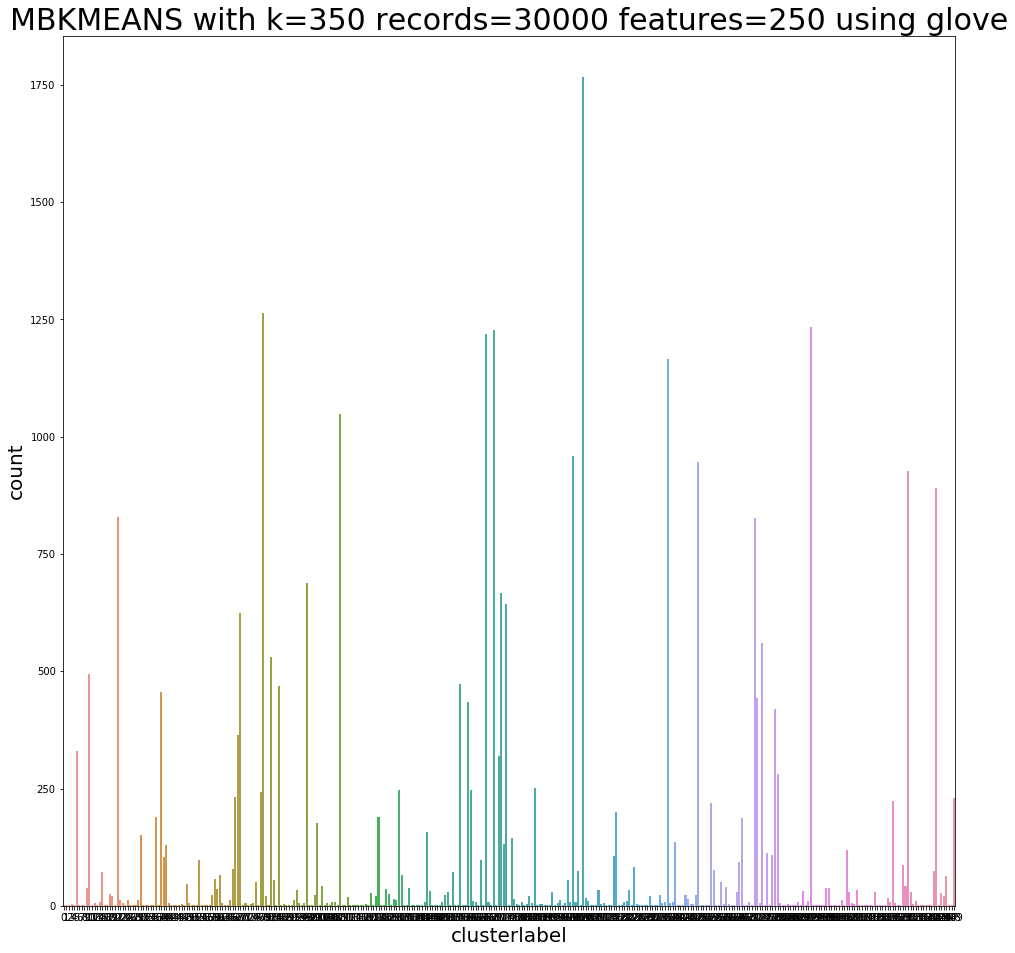

In [154]:
plt.figure(figsize=(16,16))
titlestring = "{} with k={} records={} features={} using {}".format(__algo__, k, data.shape[0], data.shape[1], __emb__)
snsplot = sns.countplot("clusterlabel", data=megadf)
snsplot.xaxis.label.set_size(20)
snsplot.yaxis.label.set_size(20)
plt.title(
        titlestring,
        fontdict = {'fontsize' : 30}
    )

### *Name given to saved files*

In [155]:
features = data.shape[1]
records = data.shape[0]
name = "{}_{}_{}_K{}_R{}_F{}".format(__algo__, __emb__, __sentemb__, k, records, features)
name

'MBKMEANS_glove_pmeans5_K350_R30000_F250'

### Saving Data

Save model

In [156]:
modelname = "{}_model.pkl".format(name)
pickle.dump(model, open(modelDir + modelname, 'wb'))

Save Plot

In [157]:
snspltname = "{}_plt.png".format(name)
snsplot.figure.savefig(plotDir + snspltname)

Save Megadf

In [158]:
clusterdfname = "{}_clustered_megadf.pkl".format(name)
megadf.to_pickle(megadfDir + clusterdfname)

Save Centroids

In [159]:
centroidDF = pd.DataFrame(centroids)
centroidDFname = "{}_centroids.pkl".format(name)
centroidDF.to_pickle(megadfDir + centroidDFname)
print(centroidDF.shape)

(350, 250)


#### Open dataframe to test

In [160]:
sub = megadf.loc[:, ["id", "title", "abstract", "clusterlabel"]]
sub.tail()

,id,title,abstract,clusterlabel
29995,1639102,Age of onset of schizophrenia in siblings: A t...,"[original, article, found, http, www, scienced...",341
29996,1639103,Reducing persistent auditory hallucinations by...,"[copyright, british, psychological, society, f...",308
29997,1639104,Investigating Visual Knowledge in Dementia of ...,"[original, article, found, http, www, scienced...",341
29998,1639105,Monaural ear advantages in simple and choice r...,"[original, article, found, http, www, scienced...",341
29999,1639106,Routes to action in reaction time tasks,"[original, publication, available, www, spring...",300


In [161]:
megadf.columns

Index(['id', 'title', 'abstract', 'embedding', 'clusterlabel'], dtype='object')

# Performance Testing and Distribution


In [162]:
metadata = pd.DataFrame(columns=["Name", "Algo", "WordEmb", "SentEmb", "K", "R", "F", "SS", "CSavg", "CSmin", "CSmax", "T2Pavg", "T2LM", "T2LMP", "MEM"])

In [163]:
metadict = {
    "Name":None,                     #Name of the save file prefix
    "Algo":None,                     #Name of the Clustering algorithm
    "WordEmb":None,                  #Name of the Word Embeddings used (glove, w2v, ftt)
    "SentEmb":None,                  #Name of Sentence Embedding algorithm used 
    "K":None, "R":None, "F":None,    #Number of clusters, records and fetures
    "T2T":None,                      #Time required to train model
    "SS":None,                       #Silhoutte Score
    "DBS":None,                      #Davis Bouldin Score
    "CSavg":None,                    #Average Cluster Size
    "CSmin":None,                    #Minimum Cluster Size
    "CSmax":None,                    #Maximum Cluster Size
    "T2Pavg":None,                   #Average Time To Predict cluster of one record
    "T2LM":None,                     #Average Time to Load Model
    "T2LMP":None,                    #Amortized time to Predict after loading the model
    "MEM":None                      #Memory used by the Model
    }
metadict

{'Name': None,
 'Algo': None,
 'WordEmb': None,
 'SentEmb': None,
 'K': None,
 'R': None,
 'F': None,
 'T2T': None,
 'SS': None,
 'DBS': None,
 'CSavg': None,
 'CSmin': None,
 'CSmax': None,
 'T2Pavg': None,
 'T2LM': None,
 'T2LMP': None,
 'MEM': None}

In [164]:
metadict["Name"]=name
metadict["Algo"]=__algo__
metadict["WordEmb"]=__emb__
metadict["SentEmb"]=__sentemb__
metadict["K"]=k
metadict["R"]=recnum
metadict["F"]=features
metadict

{'Name': 'MBKMEANS_glove_pmeans5_K350_R30000_F250',
 'Algo': 'MBKMEANS',
 'WordEmb': 'glove',
 'SentEmb': 'pmeans5',
 'K': 350,
 'R': 30000,
 'F': 250,
 'T2T': None,
 'SS': None,
 'DBS': None,
 'CSavg': None,
 'CSmin': None,
 'CSmax': None,
 'T2Pavg': None,
 'T2LM': None,
 'T2LMP': None,
 'MEM': None}

#### Time to train

In [165]:
metadict["T2T"]=timetrain

#### Scores

In [166]:
ss = silhouette_score(data, labels, metric = 'euclidean')
dbs = davies_bouldin_score(data, labels)
metadict["SS"]=ss
metadict["DBS"]=dbs

#### Cluster Size

In [167]:
clusterdata = megadf.groupby("clusterlabel", as_index=True).size().reset_index(name="count")
clusterdata.head()

,clusterlabel,count
0,0,1
1,1,1
2,2,1
3,3,3
4,4,1


In [168]:
clusterdfname = "{}_clustered_counts.pkl".format(name)
clusterdata.to_pickle(megadfDir + clusterdfname)

In [169]:
countdata = clusterdata.groupby("count").size().reset_index(name="clusters")
display(countdata.head(3))
display(countdata.tail(3))

,count,clusters
0,1,133
1,2,32
2,3,12


,count,clusters
102,1233,1
103,1263,1
104,1766,1


In [170]:
metadict["CSmax"] = max(clusterdata["count"])
metadict["CSmin"] = min(clusterdata["count"])
metadict["CSavg"] = np.mean(clusterdata["count"])

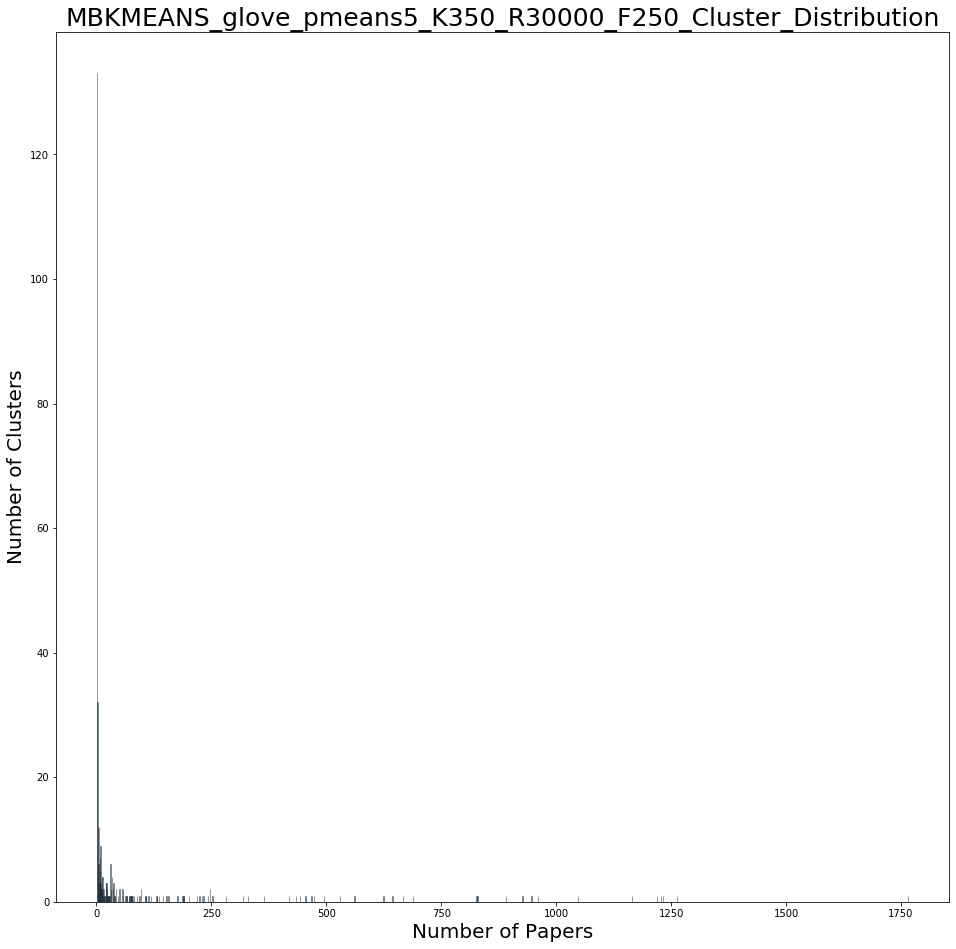

In [171]:
%matplotlib inline
plt.figure(figsize=(16,16))

sns.axes_style("whitegrid", {"axes.grid":True, 
                            'axes.spines.left': False,
                             'axes.spines.bottom': False,
                             'axes.spines.right': False,
                             'axes.spines.top': False})


titlestring = "{}_Cluster_Distribution".format(name)
snsplot = sns.distplot(clusterdata["count"], kde=False, bins=max(clusterdata["count"]),
                      hist_kws={'edgecolor':'black'},)
snsplot.set(xlabel="Number of Papers", ylabel="Number of Clusters")
snsplot.xaxis.label.set_size(20)
snsplot.yaxis.label.set_size(20)
plt.title(
        titlestring,
        fontdict = {'fontsize' : 25}
    )
plt.show()



In [172]:
snspltname = "{}_Cluster_Distribution.png".format(name)
snsplot.figure.savefig(plotDir + snspltname)

#### Prediction Time Performance

In [173]:
testdf = pd.DataFrame()
if recnum < 2000:
    samplenum = int(recnum / 10)
else:
    samplenum = 2000

for f in smalllist:
    tempdf = pd.read_pickle(f)
    testdf = megadf.append(tempdf, ignore_index = True, sort = False)
testdf = testdf.sample(samplenum, random_state=int(time.time()%100000))
predata = testdf["embedding"]
data = np.matrix(predata.to_list())
print(data.shape)

(2000, 250)


In [174]:
print("Starting Predicting Performance")
testmodel = model
start_time = time.time()
for d in data:
    lb = testmodel.predict(d)
end_time = time.time()
timetest = end_time-start_time
avgtime = timetest/data.shape[0]
print("Avgtime: {} Totaltime: {}".format(avgtime, timetest))
metadict["T2Pavg"]=avgtime

Starting Predicting Performance
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignm

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

In [175]:
print("Starting Loading Performance")
loadruns = 50
start_time = time.time()
for i in range(loadruns):
    testmodel = pickle.load(open(modelDir + modelname, 'rb'))
end_time = time.time()
timetest = end_time-start_time
avgtime = timetest/loadruns
print("Avgtime: {} Totaltime: {}".format(avgtime, timetest))
metadict["T2LM"] = avgtime
avgtime

Starting Loading Performance
Avgtime: 0.0003264856338500977 Totaltime: 0.016324281692504883


0.0003264856338500977

In [ ]:
print("Starting Amortized Performance")
loadruns = 5
avglist = []

for i in range(loadruns):
    start_time = time.time()
    testmodel = pickle.load(open(modelDir + modelname, 'rb'))
    for d in data:
        lb = testmodel.predict(d)
    end_time = time.time()
    timetest = (end_time-start_time)/data.shape[0]
    avglist.append(timetest)

timetest = np.sum(avglist)
avgtime = np.mean(avglist)
print("Avgtime: {} Totaltime: {}".format(avgtime, timetest))
metadict["T2LMP"] = avgtime
avgtime

Starting Amortized Performance
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignme

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing label assignment and total inertia
Computing 

In [ ]:
modelsize = sys.getsizeof(pickle.dumps(model))
print("modelsize:", modelsize, "bytes")
metadict["MEM"]=modelsize

In [ ]:
metadict

In [ ]:
metadata = metadata.append(metadict, ignore_index=True)
metadata

In [ ]:
metadataname = "{}_metadata.pkl".format(name)
metadata.to_pickle(metadataDir + metadataname)